<div style="text-align:left;font-size:2em"><span style="font-weight:bolder;font-size:1.25em">SP2273 | Learning Portfolio</span><br><br><span style="font-weight:bold;color:darkred">Plotting (Good)</span></div>

# What to expect in this chapter

In [ ]:
# using Object-Oriented (OO) interface

# 1 Some nomenclature

# 2 Comparing the two ‘dialects’

### pyplot Interface

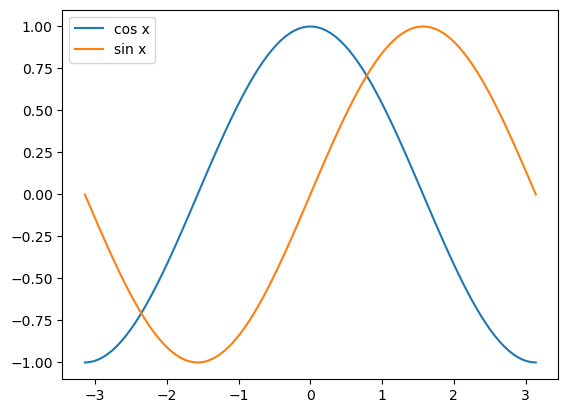

In [2]:

from matplotlib import pyplot as plt
import numpy as np

x = np.linspace(-np.pi, np.pi, num=100)
cos_x = np.cos(x)
sin_x = np.sin(x)

plt.plot(x, cos_x, label='cos x')
plt.plot(x, sin_x, label='sin x')
plt.legend()


### OO Interface

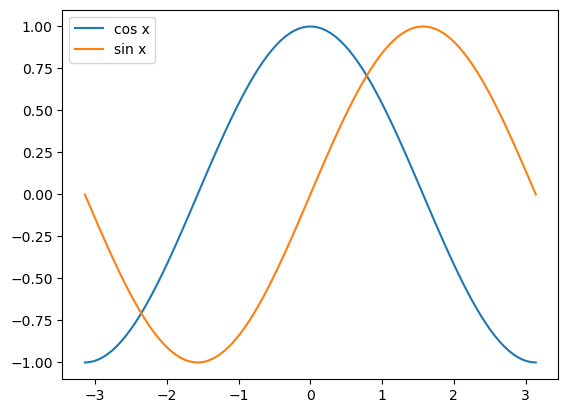

In [ ]:

import numpy as np

fig, ax = plt.subplots(nrows=1, ncols=1) # basically gives us a figure and an axis 
# figure has only 1 axis(graphs) because we said 1 row and 1 col
# also the two axes is from using "subplots"
ax.plot(x, cos_x, label='cos x')
ax.plot(x, sin_x, label='sin x')
ax.legend()

# 3 What is OO ax, really?

In [ ]:

# it's a matplotlib axis.. with two axes(graphs)

# 4 A complete OO example

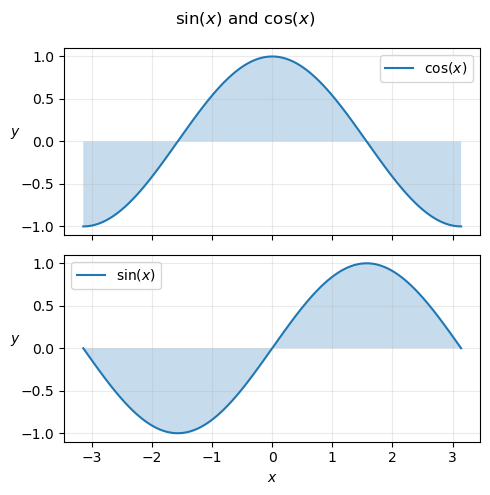

In [ ]:
# set up
fig, ax = plt.subplots(nrows=2, ncols=1,
                       figsize=(5, 5), # size of the figure
                       sharex=True) # plots share x axis

# first graph ax[0]
ax[0].plot(x, cos_x, label=r'$\cos(x)$')
ax[0].fill_between(x, 0, cos_x, alpha=.25) # fills the plot

# second graph ax[1]
ax[1].plot(x, sin_x, label=r'$\sin(x)$')
ax[1].fill_between(x, 0, sin_x, alpha=.25)

#drawing the legends, looping for all the axes(graphs)
for a in ax: 
    a.legend()
    a.grid(alpha=.25)
    a.set_ylabel('$y$', rotation=0)

# label (add the numbers) only the second plot since we sharing the axis
ax[1].set_xlabel('$x$')

# super title - the overall title for the figure
fig.suptitle(r'$\sin(x)$ and $\cos(x)$')

# ask matplotlib to make it nicer
fig.tight_layout()

# 5 Multiple rows and columns

### Using ax

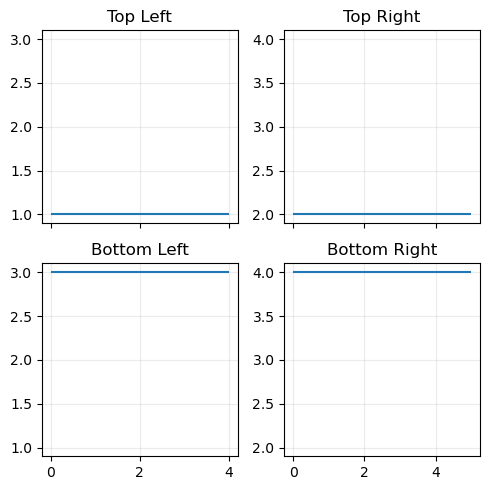

In [ ]:

fig, ax = plt.subplots(nrows=2, ncols=2,
                       figsize=(5, 5),
                       sharex='col', sharey='col')

# Some variables to access the axes and improve readabilty
top_left, top_right, bottom_left, bottom_right = ax.flatten()

top_left.set_title('Top Left')
top_right.set_title('Top Right')
bottom_left.set_title('Bottom Left')
bottom_right.set_title('Bottom Right')


# drawing the horizontal blue lines
top_left.hlines(y=1, xmin=0, xmax=4) # y is just y value, xmin and xmax are the x boundaries for the line
top_right.hlines(y=2, xmin=0, xmax=5)
bottom_left.hlines(y=3, xmin=0, xmax=4)
bottom_right.hlines(y=4, xmin=0, xmax=5)

for a in ax.flatten():
    a.grid(alpha=.25)

plt.tight_layout()


In [24]:
ax[0, 0].set_title('Top Left')
ax[0, 1].set_title('Top Right')
ax[1, 0].set_title('Bottom Left')
ax[1, 1].set_title('Bottom Right')

# ax[row, column]

Text(0.5, 1.0, 'Bottom Right')

In [25]:
# even faster

top_left, top_right, bottom_left, bottom_right = ax.flatten()

## 5.1 Sharing axes

In [ ]:
# three options

# sharex = True (all axes use the same range)
# sharex = "col" (all the plots in the same row have the same range)
# sharex = "row" (all the plots in the same column ")




## 5.2 Accessing all axes

In [ ]:
top_left.grid(alpha=.25)
top_right.grid(alpha=.25)
bottom_left.grid(alpha=.25)
bottom_right.grid(alpha=.25)

# instead of that do

for a in ax.flatten():
    a.grid(alpha=.25)

# 6 Other useful plots

## 6.1 Histograms

### Data

### A quick helper function

In [ ]:

# a function for reading the data

def get_plot_data():
    data = {}
    filename = 'sg-gov-graduate-employment-survey_basic_monthly_mean_all.csv'
    data['All'] = np.loadtxt(filename, skiprows=1)

    filename = 'sg-gov-graduate-employment-survey_basic_monthly_mean_nus.csv'
    data['NUS'] = np.loadtxt(filename, skiprows=1)

    return data


### The histogram

In [ ]:
plt.style.use('bmh')
data = get_plot_data()

# bins specifies how many bins to split the data
plt.hist([data['All'], data['NUS']], bins=50, label=['All', 'NUS'])
plt.xlabel('Mean of Basic Montly Earning (S$)')
plt.ylabel('Number of Students')
plt.legend()


## 6.2 Scatter plots

In [ ]:
plt.style.use("seaborn-v0_8-darkgrid")

data = get_plot_data()

for label, numbers in data.items():
    x = range(len(numbers)) # we just randomly made an x axis so it can be plotted but it doesnt have a physical meaning
    y = numbers
    plt.scatter(x, y, label=label, alpha=.5)

plt.xlabel('Position in the list')
plt.ylabel('Mean of Basic Montly Eraning (S$)')
plt.legend()

## 6.3 Bar charts

In [ ]:
student_numbers = {'Life Sciences': 14,
                   'Physics': 12,
                   'Chemistry': 8,
                   'Comp. Biology': 1}
majors = list(student_numbers.keys())
numbers = list(student_numbers.values())

plt.style.use('ggplot')
plt.bar(majors, numbers) # use barh() if want horizontal bars
plt.xlabel('Majors')
plt.ylabel('Number of Students')

## 6.4 Pie charts

In [ ]:
student_numbers = {'Life Sciences': 14,
                   'Physics': 12,
                   'Chemistry': 8,
                   'Comp. Biology': 1}
majors = list(student_numbers.keys())
numbers = list(student_numbers.values())

plt.style.use('fivethirtyeight')
plt.pie(numbers, 
        labels=majors,
        autopct='%1.1f%%',   # How to format the percentages
        startangle=-90                
        )
plt.title('Percentage of each major')